In [123]:



import pandas as pd
import datetime

In [11]:
def json_to_games_df(json_dict):
    game_info = []
    for game in json_dict:
        show_id = game
        for key in json_dict[game]:
            date = json_dict[game]["Date"]
            players = json_dict[game]["Players"]
            results = json_dict[game]["results"]


        game_info.append({"Show_IDs": show_id, "Date": date, "Players" : players, "Results" : results})
    
    return pd.DataFrame(game_info)
    
    
    

In [23]:

def json_to_clues_df(json_dict):
    

    all_clues = []
    for game in json_dict:
        show_id = game
        for clue in json_dict[game]['jeopardy_round']:

            clue_text = clue['clue_text']
            clue_answer = clue['clue_answer']
            clue_answerer = clue['clue_answerer']
            clue_value = clue['clue_value']

            try:
                answerer_correct = clue['Answerer Correct?']
            except:
                answerer_correct = None

            try: 
                category = clue['category']
            except:
                category = None

            try:
                clue_id = clue['clue_id'] 
            except:
                clue_id = None

            all_clues.append({"show_id": show_id, "round" : 'jeopardy_round', 'category': category, "clue_id": clue_id, "clue_text": clue_text, "answerer": clue_answerer, 'clue_value' : clue_value })

        for clue in json_dict[game]['double_jeopardy_round']:
            clue_text = clue['clue_text']
            clue_answer = clue['clue_answer']
            clue_answerer = clue['clue_answerer']
            clue_value = clue['clue_value']

            try:
                answerer_correct = clue['Answerer Correct?']
            except:
                answerer_correct = None

            try: 
                category = clue['category']
            except:
                category = None

            try:
                clue_id = clue['clue_id'] 
            except:
                clue_id = None

            all_clues.append({"show_id": show_id, "round" : 'double_jeopardy_round', 'category': category, "clue_id": clue_id, "clue_text": clue_text, "answerer": clue_answerer, 'clue_value' : clue_value })  

    return pd.DataFrame(all_clues)
        
        
        

        
            

In [124]:
def get_datetime_obj(date_string):
    return datetime.datetime.strptime(date_string, '%A, %B %d, %Y')

In [130]:
get_datetime_obj("Wednesday, June 7, 2016")

datetime.datetime(2016, 6, 7, 0, 0)

In [24]:
games_dict['Show #7778']['jeopardy_round'][0]['Answerer Correct?']

NameError: name 'games_dict' is not defined

In [25]:
all_clues

NameError: name 'all_clues' is not defined

In [26]:
pd.DataFrame(all_clues)

NameError: name 'all_clues' is not defined

In [27]:
import json
with open("all_games.txt", "r") as read_file:
    all_games_json = json.load(read_file)

In [28]:
clues_df = json_to_clues_df(all_games_json)

In [29]:
type(clues_df['clue_value'])

pandas.core.series.Series

In [126]:
games_df = json_to_games_df(all_games_json )
games_df['datetime'] = list(map(lambda x: get_datetime_obj(x),games_df['Date']))
games_df


,Date,Players,Results,Show_IDs,datetime
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17


In [31]:
import re
strng = "DD: $100"
strng = re.sub( '[$:D ]', '',strng)
int(strng)



def strng_to_value(strng):
    if strng != None and strng != ' ':
        temp = re.sub( '[,$:D ]', '', f'{strng}')
        if temp == '':
            val = None
        else:
            val = int(temp)
    else:
        val = None
    return val
        
#int(re.sub( '[,$:D ]', '', f'{strng}')) if strng is not None else False  
    

strclue_values = [strng_to_value(strng) for strng in clues_df['clue_value']]
is_daily_double = [bool(re.search('[D]', f'{clue_value}')) for clue_value in clues_df['clue_value']]
int_values = [int(strng) if strng != None else None for strng in strclue_values]

In [32]:
clues_df['int_values'] = int_values
clues_df['is_daily_double'] = is_daily_double
clues_df

,answerer,category,clue_id,clue_text,clue_value,round,show_id,int_values,is_daily_double
0,J.D.,THE OLD TESTAMENT,clue_J_1_1_stuck,"Let's all flock to read Psalm 95, in which hum...",$200,jeopardy_round,Show #4596,200.0,False
1,J.D.,SEAN SONG,clue_J_2_1_stuck,"The rap on him is he's sometimes ""Puffy""",$200,jeopardy_round,Show #4596,200.0,False
2,J.D.,CITY WALK,clue_J_3_1_stuck,In the 1980s this city passed Chicago as the U...,$200,jeopardy_round,Show #4596,200.0,False
3,Ken,SLOGANEERING,clue_J_4_1_stuck,"""Ask any mermaid you happen to see, 'What's th...",$200,jeopardy_round,Show #4596,200.0,False
4,Ken,ROOM,clue_J_5_1_stuck,"Many people have become familiar with ""Shape"",...",$200,jeopardy_round,Show #4596,200.0,False
5,Ken,"""BOARD""",clue_J_6_1_stuck,"In 2003, Roy E. Disney left it after being on ...",$200,jeopardy_round,Show #4596,200.0,False
6,Ken,THE OLD TESTAMENT,clue_J_1_2_stuck,Some say the screech owl in the King James Bib...,$400,jeopardy_round,Show #4596,400.0,False
7,Ken,SEAN SONG,clue_J_2_2_stuck,Once married to Madonna,$400,jeopardy_round,Show #4596,400.0,False
8,Ken,CITY WALK,clue_J_3_2_stuck,"This London borough is the G in GMT, squire",$400,jeopardy_round,Show #4596,400.0,False
9,Ken,SLOGANEERING,clue_J_4_2_stuck,"A fast food chain: ""If it doesn't get all over...",$400,jeopardy_round,Show #4596,400.0,False


Triple stumper by season, 

In [48]:
from collections import Counter

cat_cnt_j = Counter()
cat_cnt_dj = Counter()
cat_cnt_all = Counter()


for index, row in clues_df.iterrows():
    f = row[0]
    
    category = row['category']
    
    cat_cnt_all[category] += 1
    
    if row["round"] == 'jeopardy_round':
        cat_cnt_j[category] += 1
    
    if row["round"] == 'double_jeopardy_round':
        cat_cnt_dj[category] += 1
        
        
# or index, row in df.iterrows():
#     print(row['c1'], row['c2'])



In [79]:
all_categories, all_counts = zip(*cat_cnt_all.most_common(21))

In [78]:
j_categories, j_counts = zip(*cat_cnt_j.most_common(21))

In [77]:
dj_categories, dj_counts = zip(*cat_cnt_dj.most_common(21))

In [88]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Category Counts for All Games')

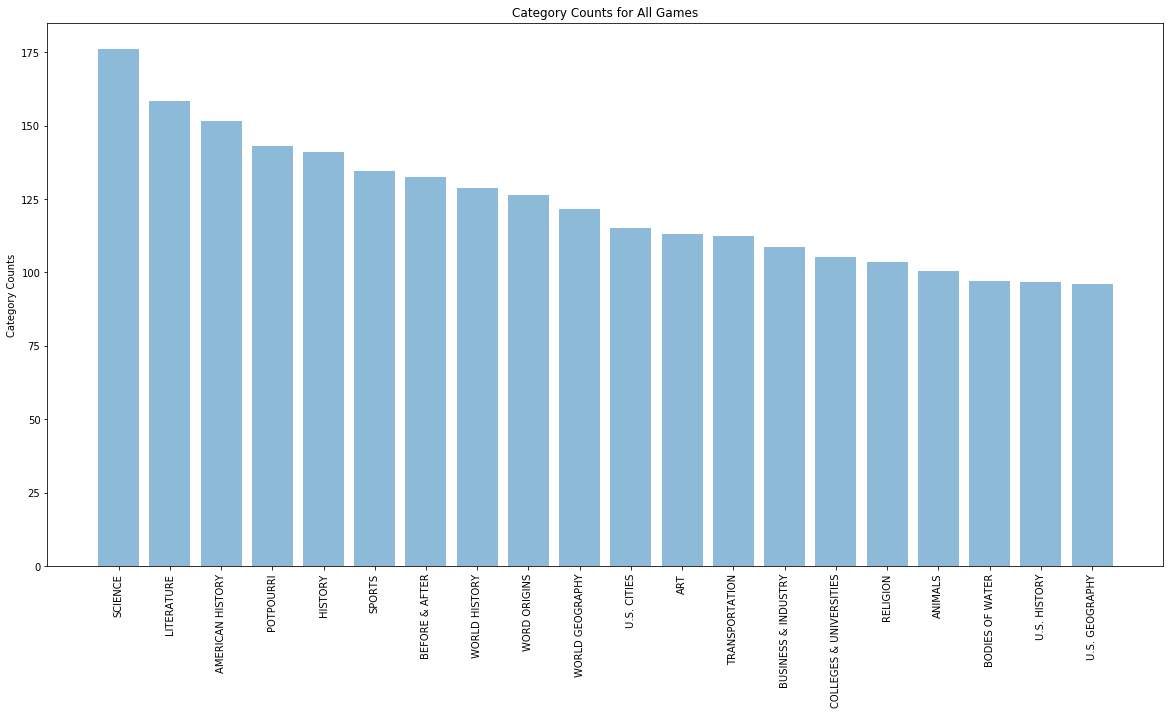

In [108]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(all_categories[1:21])),[count/5 for count in all_counts[1:21]],align="center",alpha=0.5)
plt.xticks(np.arange(len(all_categories[1:21])),all_categories[1:21],rotation = 90)
plt.ylabel("Category Counts")
plt.title("Category Counts for All Games")

Text(0.5, 1.0, 'Category Counts for Jeopardy')

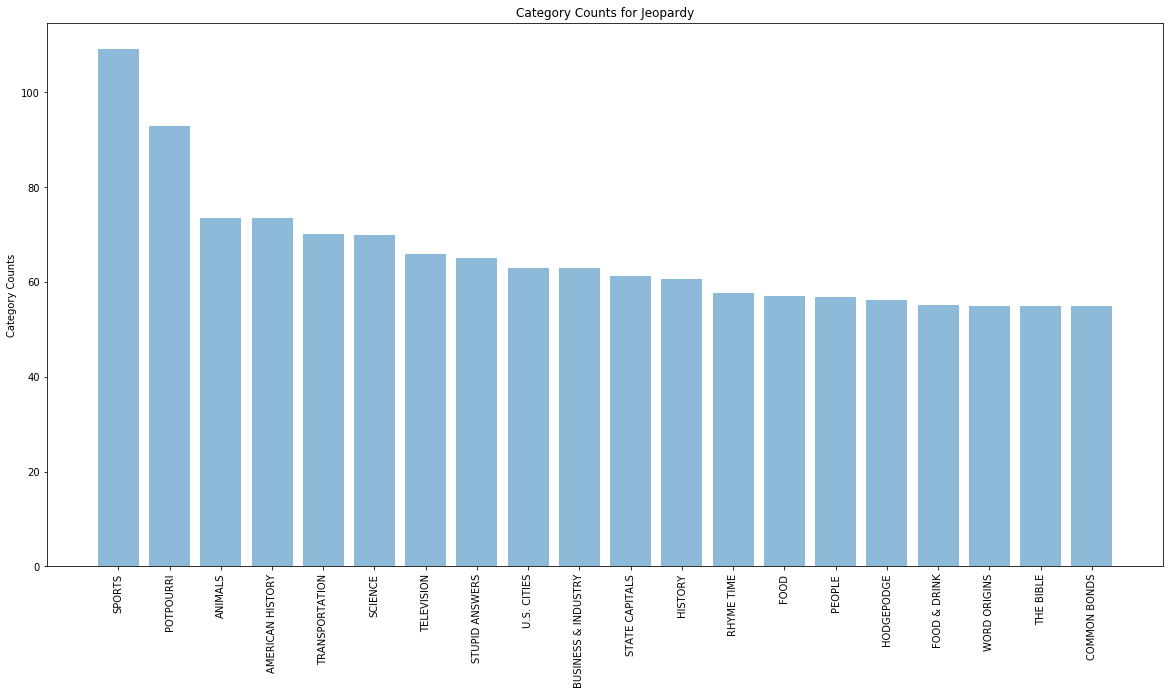

In [110]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(j_categories[1:21])),[count/5 for count in j_counts[1:21]],align="center",alpha=0.5)
plt.xticks(np.arange(len(j_categories[1:21])),j_categories[1:21],rotation = 90)
plt.ylabel("Category Counts")
plt.title("Category Counts for Jeopardy")

Text(0.5, 1.0, 'Category Counts for Double Jeopardy')

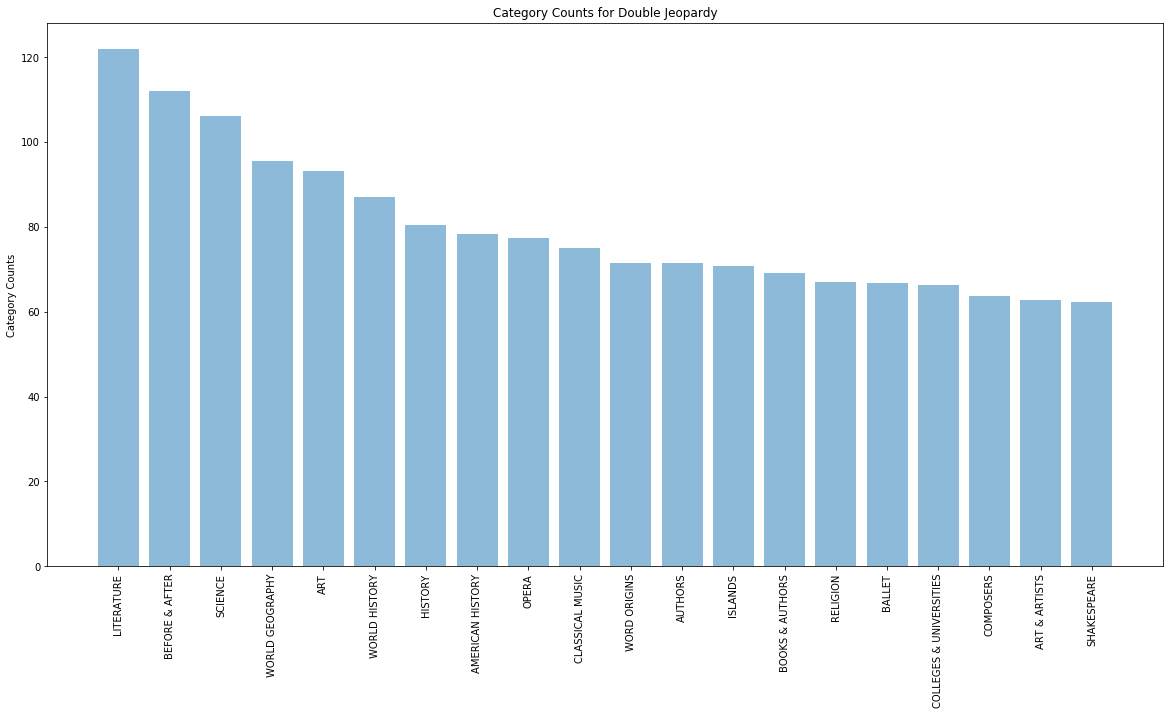

In [111]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(dj_categories[1:21])),[count/5 for count in dj_counts[1:21]],align="center",alpha=0.5)
plt.xticks(np.arange(len(dj_categories[1:21])),dj_categories[1:21],rotation = 90)
plt.ylabel("Category Counts")
plt.title("Category Counts for Double Jeopardy")

In [118]:
games_df['Results']

{'Ken': ['$4,800', '$13,800', '$31,600', '$10,001', '$29,600'],
 'Betsey': ['$1,600', '$800', '$3,200', '$1,399', '$3,200'],
 'J.D.': ['$1,800', '$3,400', '$5,000', '$3,599', '$5,000']}

Season35 2018-09-10 to 2019-07-26	(112 games archived)	
Season 34	2017-09-11 to 2018-07-27	(230 games archived)	
Season 33	2016-09-12 to 2017-07-28	(230 games archived)	
Season 32	2015-09-14 to 2016-07-29	(230 games archived)	
Season 31	2014-09-15 to 2015-07-31	(230 games archived)	
Season 30	2013-09-16 to 2014-08-01	(230 games archived)	
Season 29	2012-09-17 to 2013-08-02	(230 games archived)	
Season 28	2011-09-19 to 2012-08-03	(230 games archived)	
Season 27	2010-09-13 to 2011-07-29	(230 games archived)	
Season 26	2009-09-14 to 2010-07-30	(230 games archived)	
Season 25	2008-09-08 to 2009-07-24	(230 games archived)	
Season 24	2007-09-10 to 2008-07-25	(230 games archived)	
Season 23	2006-09-11 to 2007-07-27	(230 games archived)	
Season 22	2005-09-12 to 2006-07-28	(230 games archived)	
Season 21	2004-09-06 to 2005-07-22	(230 games archived)	
Season 20	2003-09-08 to 2004-07-23	(230 games archived)	
Season 19	2002-09-02 to 2003-07-18	(228 games archived)	
Season 18	2001-09-03 to 2002-07-19	(229 games archived)	
Season 17	2000-09-04 to 2001-07-20	(230 games archived)	
Season 16	1999-09-06 to 2000-07-21	(230 games archived)	
Season 15	1998-09-07 to 1999-07-23	(228 games archived)	
Season 14	1997-09-01 to 1998-07-17	(229 games archived)	
Season 13	1996-09-02 to 1997-07-18	(208 games archived)	
Season 12	1995-09-04 to 1996-07-19	(105 games archived)	
Season 11	1994-09-05 to 1995-07-21	(51 games archived)	
Season 10	1993-09-06 to 1994-07-22	(54 games archived)	
Season 9	1992-09-07 to 1993-07-23	(76 games archived)	
Season 8	1991-09-02 to 1992-07-17	(68 games archived)	
Season 7	1990-09-03 to 1991-07-19	(60 games archived)	
Super Jeopardy!	1990-06-16 to 1990-09-08	(13 games archived)
Season 6	1989-09-04 to 1990-07-20	(152 games archived)	
Season 5	1988-09-05 to 1989-07-21	(132 games archived)	
Season 4	1987-09-07 to 1988-07-22	(150 games archived)	
Season 3	1986-09-08 to 1987-07-24	(111 games archived)	
Season 2	1985-09-09 to 1986-06-06	(57 games archived)	
Season 1	1984-09-10 to 1985-06-07	(42 games archived)	

In [158]:
def dt(y,m,d):
    return datetime.datetime(y,m,d,0,0)



def check_season(date):
    
        
    super_jeop = [dt(1990,9,8), dt(1990,9,1), dt(1990,8,25), dt(1990,8,18), dt(1990,8,11), dt(1990,8,4),dt(1990,7,28),dt(1990,7,21), dt(1990,7,14), dt(1990,7,7),dt(1990,6,30),dt(1990,6,23), dt(1990,6,16) ]
    trebek_pilots = [dt(1983,9,18),dt(1984,1,1)]



    
    if date in super_jeop:
        return 'super_jeopardy'
    elif date in trebek_pilots:
        return 'Pilot'
    if date <= datetime.datetime(1985,6,7,0,0):
        return 1
    elif date <= datetime.datetime(1986,6,6,0,0):
        return 2
    elif date <= datetime.datetime(1987,7,24,0,0):
        return 3
    elif date <= datetime.datetime(1988,7,22,0,0):
        return 4
    elif date <= datetime.datetime(1989, 7, 21,0,0):
        return 5
    elif date <= dt(1989, 7, 20):
        return 6
    elif date <= dt(1991, 7, 19):
        return 7
    elif date <= dt(1992, 7, 17):
        return 8
    elif date <= dt(1993, 7, 23):
        return 9
    elif date <= dt(1994, 7, 22):
        return 10
    elif date <= dt(1995, 7, 21):
        return 11
    elif date <= dt(1996, 7, 19):
        return 12
    elif date <= dt(1997, 7, 18):
        return 13
    elif date <= dt(1998, 7, 17):
        return 14
    elif date <= dt(1999, 7, 23):
        return 15
    elif date <= dt(2000, 7, 21):
        return 16
    elif date <= dt(2001, 7, 20):
        return 17
    elif date <= dt(2002, 7, 19):
        return 18
    elif date <= dt(2003, 7, 18):
        return 19
    elif date <= dt(2004, 7, 23):
        return 20
    elif date <= dt(2005, 7, 22):
        return 21
    elif date <= dt(2006, 7, 28):
        return 22
    elif date <= dt(2007, 7, 23):
        return 23
    elif date <= dt(2008, 7, 25):
        return 24
    elif date <= dt(2009, 7, 24):
        return 25
    elif date <= dt(2010, 7, 30):
        return 26
    elif date <= dt(2011, 7, 29):
        return 27 
    elif date <= dt(2012, 8, 3):
        return 28
    elif date <= dt(2013, 8, 2):
        return 29
    elif date <= dt(2014, 8, 1):
        return 30
    elif date <= dt(2015, 7, 31):
        return 31
    elif date <= dt(2016, 7, 29):
        return 32
    elif date <= dt(2017, 7, 28):
        return 33
    elif date <= dt(2018, 7, 27):
        return 34
    elif date <= dt(2019, 7, 26):
        return 35
    else:
        return None
    


In [160]:
games_df['season'] = list(map(lambda x: check_season(x),games_df['datetime']))

In [161]:
games_df

,Date,Players,Results,Show_IDs,datetime,season
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06,21
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07,21
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08,21
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09,21
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10,21
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13,21
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14,21
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15,21
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16,21
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17,21


KeyError: 'Show #4596'